# Conclusions:

With the collected data from the Male Shoes Category:
1. Deliver insights of the transactions
2. Give the conversion Funnel
3. Give the Churn Rate

In [51]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

### Exploring the dataframe

In [12]:
data = pd.read_csv("ecommerce_customer_data_MaleShoesCategory.csv")
print(data.head())

   Transaction_ID  Gender Warehouse Location Device_Type  \
0               1  Female             Center      Mobile   
1              11  Female             Center      Tablet   
2              16  Female             Center     Desktop   
3              20    Male             Center      Mobile   
4              24  Female             Center      Mobile   

   Product_Browsing_Time  Total_Pages_Viewed  Items_Added_to_Cart  \
0                     60                  30                    1   
1                     31                  15                    9   
2                     60                   7                    8   
3                     38                  36                    4   
4                     59                  17                    4   

   Total_Purchases  
0                3  
1                2  
2                1  
3                2  
4                4  


### Initial Analysis

In [13]:
# Summary statistics for numeric columns

numeric_summary = data.describe()
print(numeric_summary)

       Transaction_ID  Product_Browsing_Time  Total_Pages_Viewed  \
count      500.000000             500.000000          500.000000   
mean       250.500000              30.740000           27.182000   
std        144.481833              15.934246           13.071596   
min          1.000000               5.000000            5.000000   
25%        125.750000              16.000000           16.000000   
50%        250.500000              31.000000           27.000000   
75%        375.250000              44.000000           38.000000   
max        500.000000              60.000000           50.000000   

       Items_Added_to_Cart  Total_Purchases  
count           500.000000        500.00000  
mean              5.150000          2.46600  
std               3.203127          1.74095  
min               0.000000          0.00000  
25%               2.000000          1.00000  
50%               5.000000          2.00000  
75%               8.000000          4.00000  
max              10

In [14]:
# Summary for non-numeric columns

categorical_summary = data.describe(include='object')
print(categorical_summary)

       Gender Warehouse Location Device_Type
count     500                500         500
unique      2                  3           3
top      Male             Center      Mobile
freq      261                193         178


In [15]:
# Histogram for 'Total_Pages_Viewed '

fig = px.histogram(data, x='Total_Pages_Viewed', title='Distribution of Age')
fig.show()

In [16]:
# Bar chart for 'Gender'
gender_counts = data['Device_Type'].value_counts().reset_index()
gender_counts.columns = ['Device_Type', 'Count']
fig = px.bar(gender_counts, x='Device_Type', 
             y='Count', 
             title='Device_Type Distribution')
fig.show()

# Analyzing Customer Behaviour

In [17]:
# 'Product_Browsing_Time' vs 'Total_Pages_Viewed'
fig = px.scatter(data, x='Product_Browsing_Time', y='Total_Pages_Viewed',
                 title='Product Browsing Time vs. Total Pages Viewed', 
                 trendline='ols')
fig.show()

The above scatter plot shows no consistent pattern or strong association between the time spent browsing products and the total number of pages viewed. It indicates that customers are not necessarily exploring more pages if they spend more time on the website, which might be due to various factors such as the website design, content relevance, or individual user preferences.



In [18]:
# Grouped Analysis
gender_grouped = data.groupby('Gender')['Total_Pages_Viewed'].mean().reset_index()
gender_grouped.columns = ['Gender', 'Average_Total_Pages_Viewed']
fig = px.bar(gender_grouped, x='Gender', y='Average_Total_Pages_Viewed',
             title='Average Total Pages Viewed by Gender')
fig.show()

In [24]:
devices_grouped = data.groupby('Device_Type')['Total_Pages_Viewed'].mean().reset_index()
devices_grouped.columns = ['Device_Type', 'Average_Total_Pages_Viewed']
fig = px.bar(devices_grouped, x='Device_Type', y='Average_Total_Pages_Viewed',
             title='Average Total Pages Viewed by Devices')
fig.show()

### CLV 

'Consumer Lifetime Value':

These segments are based on the relationship between total purchases, pages visited, and browsing time on the website, providing insight into the relative value that customers bring to the business based on their activity and engagement on the site

CLV = (Total Purchases * Total Paged Viewed) / Browsing Time
it then creates 3 segments of Clients

1. Low CLV : Customers classified as "Low Value" have a lower CLV compared to other segments. This means that, on average, they make fewer total purchases, visit fewer pages on the website, or have a shorter product browsing time relative to the number of purchases they make.

2. Medium Value: Customers in this segment have a moderate CLV compared to other segments. This indicates that, on average, they make a decent number of purchases, visit a reasonable number of pages, and have an adequate browsing time on the website relative to their purchases.

3. High Value: Customers classified as "High Value" have a high CLV compared to other segments. This suggests that, on average, they make many purchases, visit many pages on the website, and have a significantly longer browsing time relative to the number of purchases they make.

In [29]:
data['CLV'] = (data['Total_Purchases'] * data['Total_Pages_Viewed']) / data['Product_Browsing_Time']

data['Segment'] = pd.cut(data['CLV'], bins=[1, 2.5, 5, float('inf')],
                         labels=['Low Value', 'Medium Value', 'High Value'])

segment_counts = data['Segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']

# Create a bar chart to visualize the customer segments
fig = px.bar(segment_counts, x='Segment', y='Count', 
             title='Customer Segmentation by CLV')
fig.update_xaxes(title='Segment')
fig.update_yaxes(title='Number of Customers')
fig.show() #Analyzing Customer Behaviour


In [21]:
# Funnel analysis
funnel_data = data[['Product_Browsing_Time', 'Items_Added_to_Cart', 'Total_Purchases']]
funnel_data = funnel_data.groupby(['Product_Browsing_Time', 'Items_Added_to_Cart']).sum().reset_index()

fig = px.funnel(funnel_data, x='Product_Browsing_Time', y='Items_Added_to_Cart', title='Conversion Funnel')
fig.update_layout(yaxis_title='Items Added to Cart')
fig.show()

- In the above graph, the x-axis represents the time customers spend browsing products on the e-commerce platform. 
- The y-axis represents the number of items added to the shopping cart by customers during their browsing sessions.
- You can see that at 18 or 26 minutes there are less products added to the cart. It's optimal that the customers make the transactions in the least time.

In [22]:
# TOTAL CHURN RATE

# Calculate churn rate
data['Churned'] = data['Total_Purchases'] == 0

churn_rate = data['Churned'].mean()
print(churn_rate)

0.198


In [23]:
# Filtrar el conjunto de datos para incluir solo las observaciones dentro del lapso de tiempo de interés
data_lapso_tiempo = data[(data['Product_Browsing_Time'] >= 0) & (data['Product_Browsing_Time'] <= 20)]

# Calcular el churn rate dentro del lapso de tiempo específico
churn_rate_lapso_tiempo = (data_lapso_tiempo['Total_Purchases'] == 0).mean()
print(churn_rate_lapso_tiempo)

0.21951219512195122


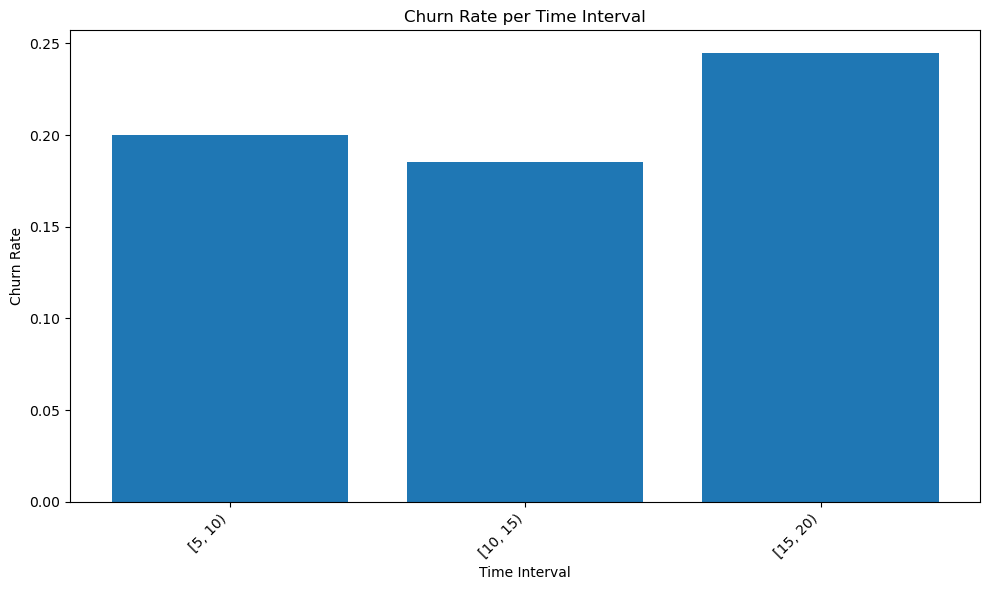

In [52]:
import pandas as pd


# Let's assume you have a DataFrame called 'data' containing the relevant information

# Divide the browsing time into 5-minute intervals
data['Time_Interval'] = pd.cut(data['Product_Browsing_Time'], bins=range(0, 25, 5), right=False)

# Calculate the churn rate for each time interval
churn_rate_intervals = data.groupby('Time_Interval')['Total_Purchases'].apply(lambda x: (x == 0).mean()).reset_index()
churn_rate_intervals.columns = ['Time_Interval', 'Churn_Rate']

# Create a bar chart to visualize the churn rate per time interval
plt.figure(figsize=(10, 6))
plt.bar(churn_rate_intervals['Time_Interval'].astype(str), churn_rate_intervals['Churn_Rate'])
plt.xlabel('Time Interval')
plt.ylabel('Churn Rate')
plt.title('Churn Rate per Time Interval')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [50]:
#Churn rate intervals

# Divide the browsing time into 5-minute intervals and convert it to strings
data['Time_Interval'] = pd.cut(data['Product_Browsing_Time'], bins=range(0, 25, 5), right=False).astype(str)

# Calculate the churn rate for each time interval
churn_rate_intervals = data.groupby('Time_Interval')['Total_Purchases'].apply(lambda x: (x == 0).mean()).reset_index()
churn_rate_intervals.columns = ['Time_Interval', 'Churn_Rate']

# Filter out NaN values before creating the chart
churn_rate_intervals_filtered = churn_rate_intervals.dropna()

# Create a bar chart using Plotly Express
fig = px.bar(churn_rate_intervals_filtered, x='Time_Interval', y='Churn_Rate',
             labels={'Time_Interval': 'Time Interval', 'Churn_Rate': 'Churn Rate'},
             title='Churn Rate per Time Interval')
fig.update_xaxes(type='category')  # Ensure that the intervals are displayed as categories
fig.show()

In [37]:
# Dividir el lapso de tiempo en intervalos de 5 minutos y convertirlo a cadena
data['Intervalo_tiempo'] = pd.cut(data['Product_Browsing_Time'], bins=range(0, 25, 5), right=False).astype(str)

# Calcular el churn rate para cada intervalo de tiempo
churn_rate_intervalos = data.groupby('Intervalo_tiempo')['Total_Purchases'].apply(lambda x: (x == 0).mean()).reset_index()
churn_rate_intervalos.columns = ['Intervalo_tiempo', 'Churn_Rate']

# Filtrar los valores NaN antes de imprimirlos
churn_rate_intervalos_filtered = churn_rate_intervalos[churn_rate_intervalos['Intervalo_tiempo'] != 'nan']

# Imprimir los intervalos y churn rates filtrados
print(churn_rate_intervalos_filtered)

  Intervalo_tiempo  Churn_Rate
0         [10, 15)    0.185185
1         [15, 20)    0.244898
2          [5, 10)    0.200000


# Insights:

- There doesn't seem to be a relationship in Total Pages Viewd and Browsing Time
- The devices prefered by our clients are Mobile, Tablet and PC (in that order)
- Churn Rates:
- A Total Churn Rate of 20% 
- As seen in the table from above, it shows us how many % of clients churn in those intervals. It's important to help our customers with an easier and faster expeience. Because around 5 - 10 minutes & 15 - 20 minutes the clients churn in an average of 20%.